<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#Load the necessary data
iris = load_iris()
X,y = iris.data, iris.target


In [3]:
#One-hot encode the labels for keras
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=3)

In [4]:
#split the data
X_train,X_test, y_train,y_test = train_test_split(X,y_one_hot,test_size=0.3,random_state=42,stratify=y)

In [6]:
#Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#Building the ANN model using the keras
model = keras.Sequential([
    #input layer of 10 hidden neurons
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    #Second hidden layer with  5
    keras.layers.Dense(5,activation = 'relu'),
    #Output layes with 3 neurons and softmax for the probabilities
    keras.layers.Dense(3,activation='softmax')
                          ])

In [12]:
#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics= ['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Training the model
print("\nTraining the keras model....")
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2,batch_size=10,verbose=10)
print("Training is completed")


Training the keras model....
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Training is completed


In [16]:
#Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test,y_test, verbose=0)
print(f"\nModel Accuracy on Test Data: {accuracy * 100:.2f}%")


Model Accuracy on Test Data: 80.00%


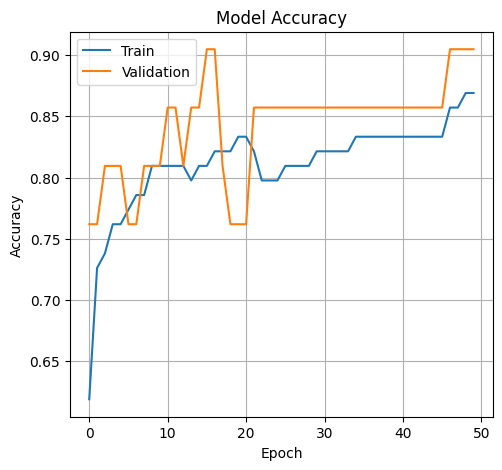

In [19]:
#plot training & validation history
plt.figure(figsize=(12,5))

#plot training & validation accuracy value
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid(True)

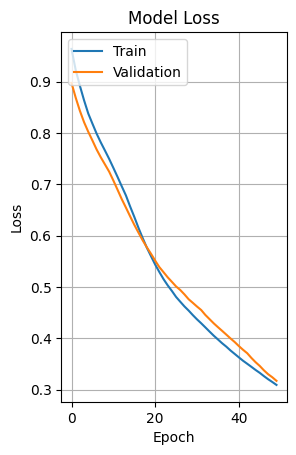

In [22]:
#plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc ='upper left')
plt.grid(True)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Text(0.5, 1.0, 'Confusion Matrix (Keras Model)')

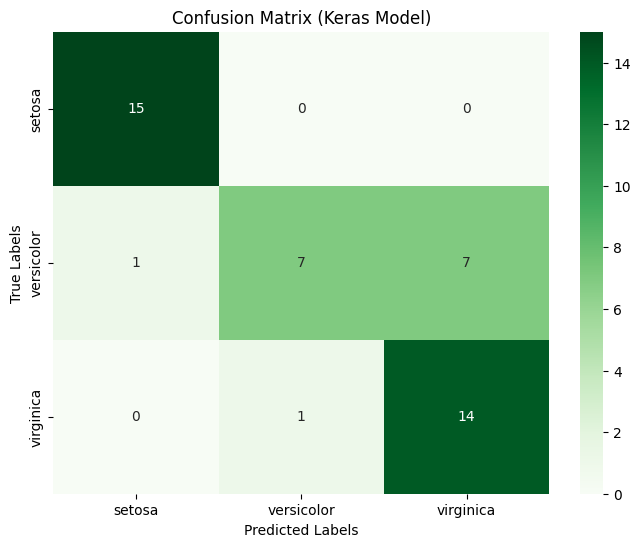

In [24]:
#plot the grapg of confusion matrix
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs,axis=1)
y_test_labels = np.argmax(y_test,axis=1)

cm = confusion_matrix(y_test_labels,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens',xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Keras Model)')
